In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from uncertainties import ufloat
from uncertainties.unumpy import uarray
import matplotlib.pyplot as plt
from scipy.odr import RealData
import sys; sys.path.append('../'); import tools
from IPython.display import display, Math, Latex

In [2]:
m_per_pc = 3.086e+16 # m/pc

# 7.2

## 1. Age of Crab

In [3]:
scale_76 = 576/33.4 # arcsec/cm
dist_76 = uarray([10.4, 9.5, 7.3, 9.5, 6.3, 7.2, 6.7, 8.9, 9.9], 0.1) * scale_76 # arcsec

In [4]:
scale_42 = 576/33.8 # arcsec/cm
dist_42 = uarray([9.8, 9.1, 7.1, 9.3, 6.2, 7.0, 6.5, 8.6, 9.6], 0.1) * scale_42 # arcsec

In [5]:
dx = dist_76 - dist_42
dt = 34 # a

In [6]:
mu = dx/dt
Latex("Age: ${:L}$ years".format(np.mean(dist_76/mu)))

<IPython.core.display.Latex object>

## 2. Distance to Crab

In [7]:
dlmbd = 30e-9 * ufloat(1.1,0.1)/0.8
v = 3e8 / 3727e-9 * dlmbd / 2
mu = (dx*0.48e-5)/(dt * 60*60*24*365.25)

In [8]:
v, mu.mean()

(1660182.4523745638+/-150925.67748859673,
 2.88563295786791e-14+/-3.615416899067819e-15)

In [9]:
d_crab = v / mu.mean()  * 3.24078e-17
Latex("Distance: ${:L}$ pc".format(d_crab))

<IPython.core.display.Latex object>

## 3. Pulsar periods

In [10]:
T_0809_74 = ufloat(34.8,0.1)/3 / 9 # s
Latex('${:L}$'.format(T_0809_74))

<IPython.core.display.Latex object>

In [11]:
T_0329_54 = ufloat(32.2,0.1)/5 / 9 # s
Latex('${:L}$'.format(T_0329_54))

<IPython.core.display.Latex object>

In [12]:
T_0950_08 = ufloat(9.15, 0.1)/4 / 9 # s
Latex('${:L}$'.format(T_0950_08))

<IPython.core.display.Latex object>

## 4. Dispersion

In [13]:
delta_t = uarray([2.5, 1.4, 12.3],0.1) / 9 # 74, 08, 54
f1 = 234
f2 = 405

In [14]:
nd = delta_t / (4150*(f1**-2-f2**-2))
[x.format('P') for x in nd]

['5.50±0.22', '3.08±0.22', '27.07±0.22']

## 5. Electron density

In [15]:
nd_crab = 56 # cm⁻³ pc
n = nd_crab / (d_crab) # cm⁻³ask 1
Latex('$n = {:L}\,\mathrm{{cm^3}}$'.format(n))

<IPython.core.display.Latex object>

## 6. Pulsar distances

In [16]:
d = nd/n
names = ['PSR 0809+74', 'PSR 0950+08', 'PSR 0329+54']

In [17]:
_=[display(names[i]+': '+d[i].format('P')+' pc') for i in range(0,3)]

'PSR 0809+74: 183±29 pc'

'PSR 0950+08: 103±17 pc'

'PSR 0329+54: (9.0±1.4)×10² pc'

# 7.3

## Lab-Task 1

In [18]:
f,S = np.loadtxt('all_converted.txt',float, skiprows=1, unpack=True)

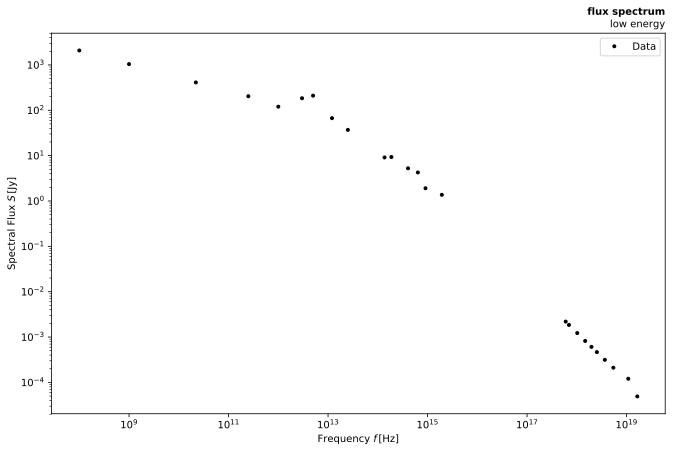

In [19]:
ax = tools.Axes(title=('flux spectrum', 'low energy'),
                ylabel=r'Spectral Flux $S\,[\mathrm{Jy}]$',xlabel=r'Frequency $f\,[\mathrm{Hz}]$', 
                logx=True, logy=True)
ax.addPlot(tools.data(f[:25],S[:25]),marker=".")
ax.addLegend()

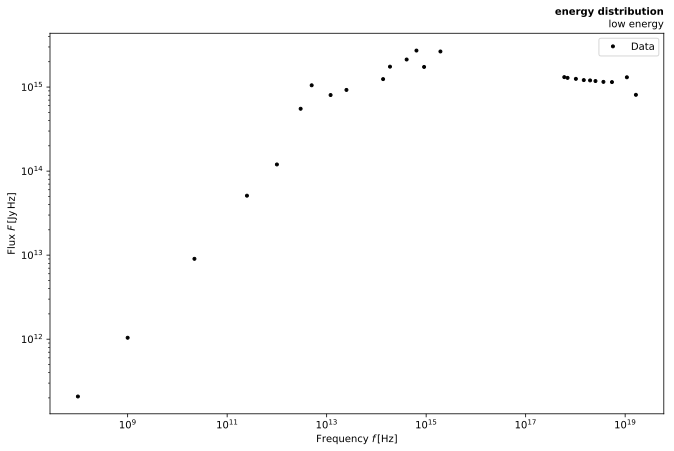

In [20]:
ax = tools.Axes(title=('energy distribution', 'low energy'),
                ylabel=r'Flux $F\,[\mathrm{Jy\,Hz}]$',xlabel=r'Frequency $f\,[\mathrm{Hz}]$', 
                logx=True, logy=True)
ax.addPlot(tools.data(f[:25],S[:25]*f[:25]),marker=".")
ax.addLegend()

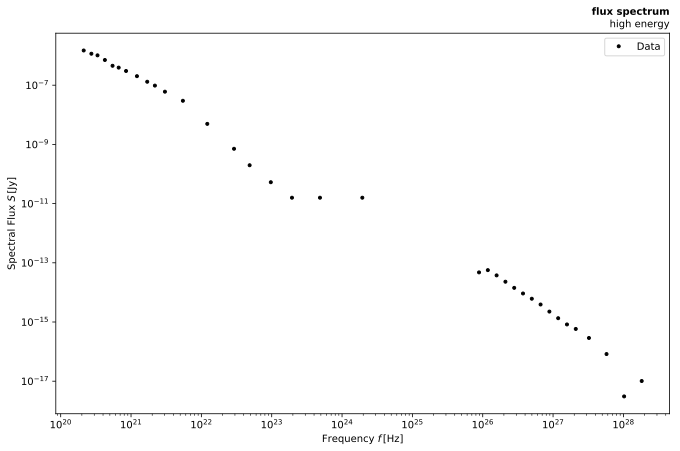

In [21]:
ax = tools.Axes(title=('flux spectrum', 'high energy'),
                ylabel=r'Spectral Flux $S\,[\mathrm{Jy}]$',xlabel=r'Frequency $f\,[\mathrm{Hz}]$', 
                logx=True, logy=True)
ax.addPlot(tools.data(f[25:],S[25:]),marker=".")
ax.addLegend()

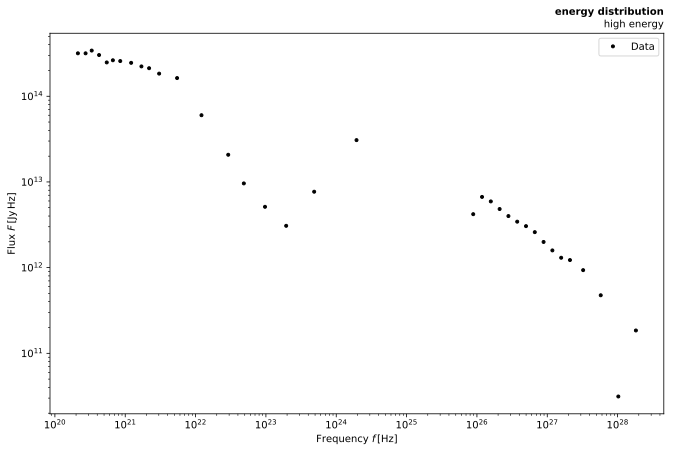

In [22]:
ax = tools.Axes(title=('energy distribution', 'high energy'),
                ylabel=r'Flux $F\,[\mathrm{Jy\,Hz}]$',xlabel=r'Frequency $f\,[\mathrm{Hz}]$', 
                logx=True, logy=True)
ax.addPlot(tools.data(f[25:],S[25:]*f[25:]),marker=".")
ax.addLegend()

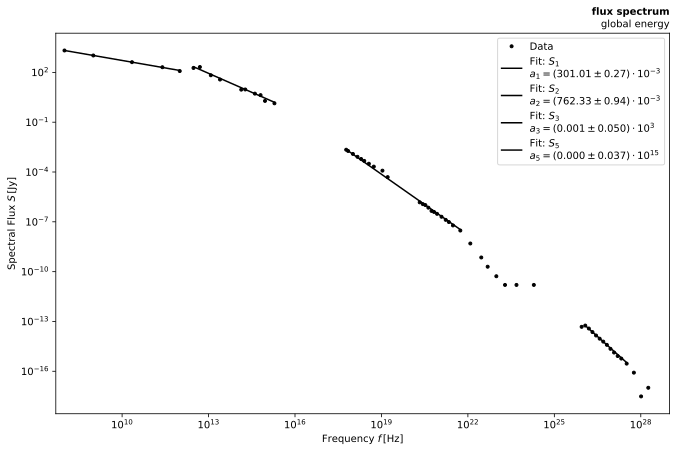

In [23]:
func = lambda index: (lambda beta, x: S[index]/((x/f[index])**beta[0]))
data = lambda i1, i2: tools.data(f[i1:i2],S[i1:i2])
fit1 = tools.Fit(data(0,5),func(0),[1],func_params=['a_1'],func_latex='$S_1$')
fit2 = tools.Fit(data(5,15),func(10),[1],func_params=['a_2'],func_latex='$S_2$')
fit3 = tools.Fit(data(15,37),func(27),[1],func_params=['a_3'],func_latex='$S_3$')
#fit4 = tools.Fit(data(37,42),func(37),[1],func_params=['a_4'],func_latex='$S_4$')
fit5 = tools.Fit(data(45,57),func(45),[1],func_params=['a_5'],func_latex='$S_5$')
ax = tools.Axes(title=('flux spectrum', 'global energy'),
                ylabel=r'Spectral Flux $S\,[\mathrm{Jy}]$',xlabel=r'Frequency $f\,[\mathrm{Hz}]$', 
                logx=True, logy=True, xlim=(5e7,1e29))
ax.addPlot(tools.data(f,S),marker=".")
ax.addFit(fit1).addFit(fit2).addFit(fit3).addFit(fit5)
ax.addLegend()

In [24]:
display(fit1.result['a_1'].n)
display(fit2.result['a_2'].n)
display(fit3.result['a_3'].n)
fit5.result['a_5'].n

0.3010125688464159

0.7623258995464749

1.2171414764487256

1.5522452827170334

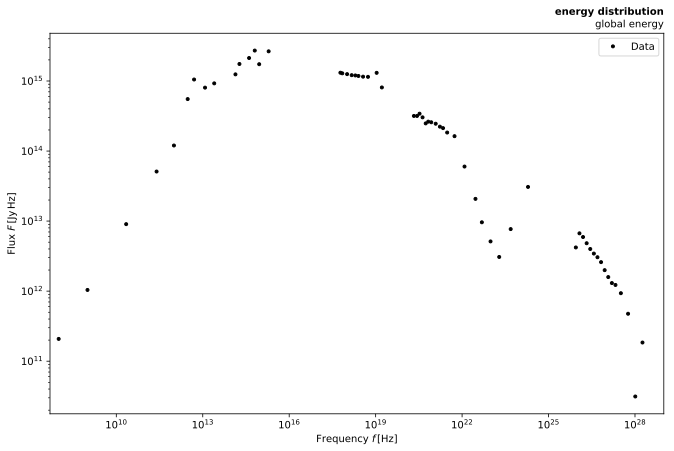

In [25]:
ax = tools.Axes(title=('energy distribution', 'global energy'),
                ylabel=r'Flux $F\,[\mathrm{Jy\,Hz}]$',xlabel=r'Frequency $f\,[\mathrm{Hz}]$', 
                logx=True, logy=True, xlim=(5e7,1e29))
ax.addPlot(tools.data(f,S*f),marker=".")
ax.addLegend()

## Lab-Task 2

In [26]:
S_crab = (np.sum(f[:-1]*S[:-1]*(np.log(f[1:])-np.log(f[:-1]))) + np.sum(f[1:]*S[1:]*(np.log(f[1:])-np.log(f[:-1]))))/2 # Jy Hz
S_crab = S_crab*1e-26 # J m⁻² s⁻¹
Latex('S = {:.2e} J m⁻² s⁻¹'.format(S_crab))

<IPython.core.display.Latex object>

In [27]:
S_sun = 1367 # J m⁻² s⁻¹
Latex('$S_{{crab}}=$ {:.2e}$\;S_{{sun}}$'.format(S_crab/S_sun))

<IPython.core.display.Latex object>

In [28]:
pi = 3.1415
L_sun = 3.845e26 # W

In [29]:
L_crab = 4*pi*(d_crab*m_per_pc)**2*S_crab
Latex('$L_{{crab}}={:L}\;L_{{sun}}$'.format(L_crab/L_sun)) # J/s

<IPython.core.display.Latex object>

## Lab-Task 3

In [30]:
m_e = 9.11e-31 # kg
e = 1.602e-19  # C
B = 40e-9      # T

In [31]:
freq = np.array([150e6, 550e12, 1e16, 1e21]) # Hz (radio, optic, x-ray, gamma)
freq_names = ['radio', 'optic', 'x-ray', 'gamma']
f_b = e * B / (2*pi * m_e) # cyclotron frequency
gamma = (freq/(0.29*f_b*0.7))**0.5
['{:.3e}'.format(x) for x in gamma]

['8.124e+02', '1.556e+06', '6.633e+06', '2.098e+09']

In [32]:
sig_T = 6.65e-29 # m²
c = 3e8 # m s⁻²
mu_0 = 1.257e-6

In [33]:
t_s = (6*mu_0*m_e*c)/(4*sig_T*B**2*gamma)
t_s_y = t_s / (365.25*24*60*60) # years
display(Latex('cooling times:'))
['{:.3e} a'.format(x) for x in t_s_y]

<IPython.core.display.Latex object>

['1.889e+05 a', '9.865e+01 a', '2.314e+01 a', '7.316e-02 a']

## Lab-Task 4

In [34]:
M_sun = 1.989e30 # kg

In [38]:
I = 0.4*1.6*M_sun*16e3**2
P = 0.0333 #s
E_rot = 0.5*I*(2*pi/P)**2 # J
Latex('$E_{{rot}}$ = {:.2e} J'.format(E_rot))

<IPython.core.display.Latex object>

In [36]:
P_dot = 4.22e-13
E_rot_dot = -I*(2*pi/P)*(2*pi/P**2)*P_dot
Latex('$\dot E_{{rot}}=$ {:.2e} W $\;\;(\,L_{{crab}} =$ {:P} W $)$'.format(E_rot_dot, L_crab))

<IPython.core.display.Latex object>